# Assemblin Simulator Data 16 - 17 November

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.express as ex
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)

# 1. Read and Preprocessing Data

In [2]:
#Import data, replace -999 as NaN value, and print samples
X = pd.read_csv('buiding-16-17-nov.csv', na_values = ['-999'])
X.sample(5)

,Date,Time,Room Temperature,Room Setpoint,Heating Demand,Heating Power,Cooling Demand,Cooling Power,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External,Supply Air Temp
624,17/11/2020,03:05:20,18.904932,17.0,0.000000,0.000000,100.0,503.688843,5.13,5.13,0.00,0.00,18.528532
503,17/11/2020,01:02:18,18.837530,17.0,0.000000,0.000000,100.0,481.210358,5.09,5.09,0.00,0.00,18.655405
988,17/11/2020,09:23:33,21.738756,21.0,0.000000,0.000000,100.0,836.465759,5.16,5.16,0.15,0.15,18.588434
157,16/11/2020,19:04:07,19.988684,21.0,26.935368,260.577789,0.0,0.000000,5.09,5.09,0.00,0.00,18.621321
588,17/11/2020,02:29:20,18.870249,17.0,0.000000,0.000000,100.0,490.894928,5.10,5.10,0.00,0.00,18.605925


In [3]:
#Check the column type to see if there is object
print('------------- COLUMN TYPE -------------')
print(X.dtypes)

------------- COLUMN TYPE -------------
Date                             object
Time                             object
Room Temperature                float64
Room Setpoint                   float64
Heating Demand                  float64
Heating Power                   float64
Cooling Demand                  float64
Cooling Power                   float64
Current Outside Temperature     float64
Outside Temperature External    float64
Current Solar Power             float64
Solar Power External            float64
Supply Air Temp                 float64
dtype: object


In [4]:
#Combine the Date and Time column and change it to date time format
X['Date'] = X['Date'] + " " + X['Time']
X['Date'] = pd.to_datetime(X['Date'], format = "%d/%m/%Y %H:%M:%S")

#Delete Time column and change Date column to Datetime
X.drop(['Time'], inplace = True, axis = 1)
X.rename(columns = {'Date': 'Datetime'}, inplace = True)
X.head(5)

,Datetime,Room Temperature,Room Setpoint,Heating Demand,Heating Power,Cooling Demand,Cooling Power,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External,Supply Air Temp
0,2020-11-16 16:12:56,21.678083,21.0,0.0,0.0,25.246922,209.749374,5.23,5.23,1.96,1.96,18.575039
1,2020-11-16 16:13:56,21.830853,21.0,0.0,0.0,33.018181,280.676514,5.23,5.23,1.96,1.96,18.561422
2,2020-11-16 16:14:56,21.905426,21.0,0.0,0.0,40.415432,345.570404,5.23,5.23,1.96,1.96,18.593515
3,2020-11-16 16:15:56,21.929564,21.0,0.0,0.0,47.385460,403.472534,5.23,5.23,1.96,1.96,18.646851
4,2020-11-16 16:16:56,21.918524,21.0,0.0,0.0,53.727268,457.168640,5.23,5.23,1.96,1.96,18.646645


In [5]:
print('---------- COLUMN TYPE AFTER CHANGING --------')
print(X.dtypes)

---------- COLUMN TYPE AFTER CHANGING --------
Datetime                        datetime64[ns]
Room Temperature                       float64
Room Setpoint                          float64
Heating Demand                         float64
Heating Power                          float64
Cooling Demand                         float64
Cooling Power                          float64
Current Outside Temperature            float64
Outside Temperature External           float64
Current Solar Power                    float64
Solar Power External                   float64
Supply Air Temp                        float64
dtype: object


In [6]:
#Set Datetime to be the index column
X.set_index(['Datetime'], inplace = True)
X.sample(5)

,Room Temperature,Room Setpoint,Heating Demand,Heating Power,Cooling Demand,Cooling Power,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External,Supply Air Temp
Datetime,,,,,,,,,,,
2020-11-17 04:44:24,18.975368,17.0,0.000000,0.000000,100.0,500.678711,5.18,5.18,0.0,0.0,18.621111
2020-11-16 21:49:13,18.744740,17.0,0.000000,0.000000,100.0,474.735748,5.13,5.13,0.0,0.0,18.611856
2020-11-17 01:57:19,18.846493,17.0,0.000000,0.000000,100.0,491.296967,5.09,5.09,0.0,0.0,18.579781
2020-11-16 23:09:13,18.740849,17.0,0.000000,0.000000,100.0,485.575256,5.23,5.23,0.0,0.0,18.517799
2020-11-17 08:04:31,20.396351,21.0,36.318672,334.288147,0.0,0.000000,5.20,5.20,0.0,0.0,18.535784


## 2. Explore Data

In [7]:
X.head(10)

,Room Temperature,Room Setpoint,Heating Demand,Heating Power,Cooling Demand,Cooling Power,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External,Supply Air Temp
Datetime,,,,,,,,,,,
2020-11-16 16:12:56,21.678083,21.0,0.0,0.0,25.246922,209.749374,5.23,5.23,1.96,1.96,18.575039
2020-11-16 16:13:56,21.830853,21.0,0.0,0.0,33.018181,280.676514,5.23,5.23,1.96,1.96,18.561422
2020-11-16 16:14:56,21.905426,21.0,0.0,0.0,40.415432,345.570404,5.23,5.23,1.96,1.96,18.593515
2020-11-16 16:15:56,21.929564,21.0,0.0,0.0,47.385460,403.472534,5.23,5.23,1.96,1.96,18.646851
2020-11-16 16:16:56,21.918524,21.0,0.0,0.0,53.727268,457.168640,5.23,5.23,1.96,1.96,18.646645
2020-11-16 16:17:56,21.884539,21.0,0.0,0.0,59.728851,503.299133,5.23,5.23,1.96,1.96,18.674725
2020-11-16 16:18:56,21.839584,21.0,0.0,0.0,65.126053,543.211975,5.23,5.23,1.96,1.96,18.700867
2020-11-16 16:19:56,21.788397,21.0,0.0,0.0,70.035515,581.886047,5.23,5.23,1.96,1.96,18.676630
2020-11-16 16:20:56,21.733406,21.0,0.0,0.0,74.459885,618.814270,5.23,5.23,1.96,1.96,18.619617


Data description is shown as below.

|<div style="width:25px"><b>No.</b></div>|<div style="width:150px"><b>Name</b></div>|<div style="width:210px"><b>Description</b></div>|<div style="width:500px"><b>Note</b></div>|
|:------:|:---------------|:---------|:------|
|0| _Datetime_ | The recorded time of data |<font size="2">The <i>Datetime</i> is sorted. The <i>Datetime</i> shows that a row of data is mostly recorded once per minute. The simulator sometimes crashes, so there might be some missing time. For example, continuous rows are printed below. Timestamp at 19:53 and 19:54 are missing.</font>|
|1| _Room Temperature_ | The room's current temperature |<font size="2">This value, together with the <i>Room Setpoint</i>, are the criteria controlling the on/off of the heating/cooling system.</font>|
|2| _Room Setpoint_ | The most desired temperature for the room to be at |<font size="2"><i>Room Setpoint</i> changes to 21 degrees at 8 AM and 17 degrees at 9 PM (also 17 degrees during the weekends, but this setting is not included in this document since the dataset only covers weekday).</font>|
|3| Heating/Cooling Demand | The percentage of capacity of the running heating/cooling system |<font size="2">There is a comfort error: if the <i>Room Temperature</i> is in <i>Room Setpoint</i> ± comfort error range, the cooling and heating are off. The comfort range in the morning is ±0.5 degree and at night is ±1.0 degree.</font>|
|4| Heating/Cooling Power | Total power consumed for _Heating/Cooling Demand_ (in W) |<font size="2">The total sum of <i>Heating/Cooling Power</i> is the guideline to determine whether the model reduces the power consumption or when decide the most suitable models.</font>|
|5| _Outside Temperature External_ & _Solar Power External_ | Outdoor temperature and solar power |<font size="2">These are the inputs of the simulator, updating real-time from FMI once per hour.</font>|
|6| _Current Outside Temperature_ & _Current Solar Power_ | Outdoor temperature and solar power |<font size="2">These are simulator's variable to save the <i>External</i> columns. Thus, the <i>Outside Temperature</i> columns are the same, as well as the <i>Solar Power</i> columns. Exceptions are in the first minute of each hour when the <i>External</i> are updated; the <i>Current</i> one have not updated. The <i>Current</i> changes in the next minute, so 1 minute delay. An example is at 20:00 in below.</font>|

In [8]:
X.iloc[202:212]

,Room Temperature,Room Setpoint,Heating Demand,Heating Power,Cooling Demand,Cooling Power,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External,Supply Air Temp
Datetime,,,,,,,,,,,
2020-11-16 19:51:09,19.995201,21.0,23.074440,223.222794,0.0,0.0,5.09,5.09,0.0,0.0,18.597004
2020-11-16 19:52:09,19.987881,21.0,30.460636,294.830048,0.0,0.0,5.09,5.09,0.0,0.0,18.568295
2020-11-16 19:55:10,19.979568,21.0,52.749443,510.745728,0.0,0.0,5.09,5.09,0.0,0.0,18.598028
2020-11-16 19:56:10,19.981239,21.0,60.082317,580.698242,0.0,0.0,5.09,5.09,0.0,0.0,18.650175
2020-11-16 19:57:10,19.984983,21.0,67.360680,652.231934,0.0,0.0,5.09,5.09,0.0,0.0,18.642746
2020-11-16 19:58:10,19.990667,21.0,74.570541,721.455872,0.0,0.0,5.09,5.09,0.0,0.0,18.604342
2020-11-16 19:59:10,19.998133,21.0,81.699417,789.052734,0.0,0.0,5.09,5.09,0.0,0.0,18.520565
2020-11-16 20:00:10,19.993792,21.0,24.426407,236.023712,0.0,0.0,5.09,5.14,0.0,0.0,18.557287
2020-11-16 20:01:10,19.986923,21.0,31.815001,307.820068,0.0,0.0,5.14,5.14,0.0,0.0,18.646133


In [9]:
print('Shape =', X.shape)
print()
print('NaN value at each column:')
print(X.isna().sum())

Shape = (1258, 11)

NaN value at each column:
Room Temperature                0
Room Setpoint                   0
Heating Demand                  0
Heating Power                   0
Cooling Demand                  0
Cooling Power                   0
Current Outside Temperature     0
Outside Temperature External    2
Current Solar Power             0
Solar Power External            0
Supply Air Temp                 0
dtype: int64


There are 1258 rows in total with 2 missing values in the _Outside Temperature External_ column.

In [10]:
X[X.isnull().any(axis = 1)]

,Room Temperature,Room Setpoint,Heating Demand,Heating Power,Cooling Demand,Cooling Power,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External,Supply Air Temp
Datetime,,,,,,,,,,,
2020-11-16 19:28:08,19.974972,21.0,53.031029,513.681152,0.0,0.00000,5.09,NaN,0.0,0.0,18.624968
2020-11-17 03:40:23,18.932343,17.0,0.000000,0.000000,100.0,500.95108,5.13,NaN,0.0,0.0,18.580984


Since the _Outside Terperature_ and _Solar Power_ are updated once per hour, not once per minute like the timestamp, these missing values can be replaced with the _Outside Temperature_ of that hour. The first NaN is changed to 5.09, while the second Nan is changed to 5.13.

In [11]:
X['Outside Temperature External'].fillna(X['Current Outside Temperature'], inplace = True)

In [12]:
X.describe().round(3)

,Room Temperature,Room Setpoint,Heating Demand,Heating Power,Cooling Demand,Cooling Power,Current Outside Temperature,Outside Temperature External,Current Solar Power,Solar Power External,Supply Air Temp
count,1258.000,1258.000,1258.000,1258.000,1258.000,1258.000,1258.000,1258.000,1258.000,1258.000,1258.000
mean,20.102,18.965,6.246,60.280,78.766,489.658,5.252,5.253,0.934,0.937,18.589
std,1.357,2.000,19.293,186.744,37.261,261.288,0.253,0.256,1.980,1.983,0.050
min,18.709,17.000,0.000,0.000,0.000,0.000,5.080,5.080,0.000,0.000,18.420
25%,18.883,17.000,0.000,0.000,72.020,470.567,5.130,5.130,0.000,0.000,18.557
50%,19.107,17.000,0.000,0.000,100.000,495.183,5.180,5.180,0.000,0.000,18.592
75%,21.722,21.000,0.000,0.000,100.000,570.345,5.220,5.220,0.150,0.150,18.621
max,22.120,21.000,100.000,974.187,100.000,884.749,6.490,6.490,7.270,7.270,18.758


- The _Supply Air Temp_ values are from 18.589 to 18.758, meaning the _Supply Air Temp_ does not change much throughout the day. It can be excluded from the data analysis process.

- This document focus on how the building interacts with outdoor temperature. Thus, other Solar data is ignored.

- The _Room Temperature, Room Setpoint, Current Outsize Temperature, Outside Temperature External_ features are quite in the same range (values are less than 30 degrees). So those will be plotted together.

- The _Heating/Cooling Demand_ range is from 0 to 100. _Heating/Cooling Power_ is from 0 to 1000. These can be plotted together.

In [13]:
#Delete Suppy Air Temp, Current Solar Power, Solar Power External columns
X.drop(['Supply Air Temp', 'Current Solar Power', 'Solar Power External'], axis = 1, inplace = True)
X.sample(5)

,Room Temperature,Room Setpoint,Heating Demand,Heating Power,Cooling Demand,Cooling Power,Current Outside Temperature,Outside Temperature External
Datetime,,,,,,,,
2020-11-16 18:18:04,20.360052,21.0,0.0,0.0,0.000000,0.000000,5.08,5.08
2020-11-17 08:34:32,21.799036,21.0,0.0,0.0,73.752838,615.235596,5.20,5.20
2020-11-17 12:29:40,22.061449,21.0,0.0,0.0,100.000000,868.888855,5.82,5.82
2020-11-17 10:42:39,22.027681,21.0,0.0,0.0,100.000000,870.787415,5.21,5.21
2020-11-16 21:51:13,18.747318,17.0,0.0,0.0,100.000000,465.079437,5.13,5.13


## 3. Visualizing Data

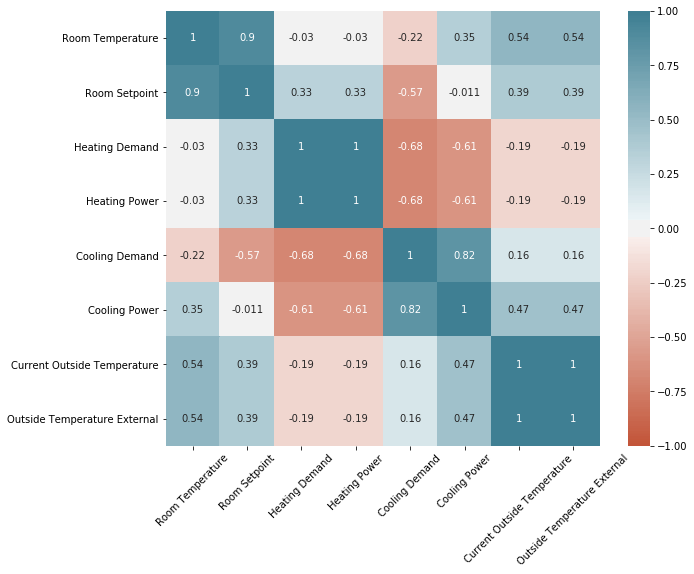

In [14]:
#Correlation matrix
plt.figure(figsize = (10,8))
corr = X.corr()
ax = sns.heatmap(
    corr, annot = True,
    vmin=-1, vmax=1, center= 0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0
);

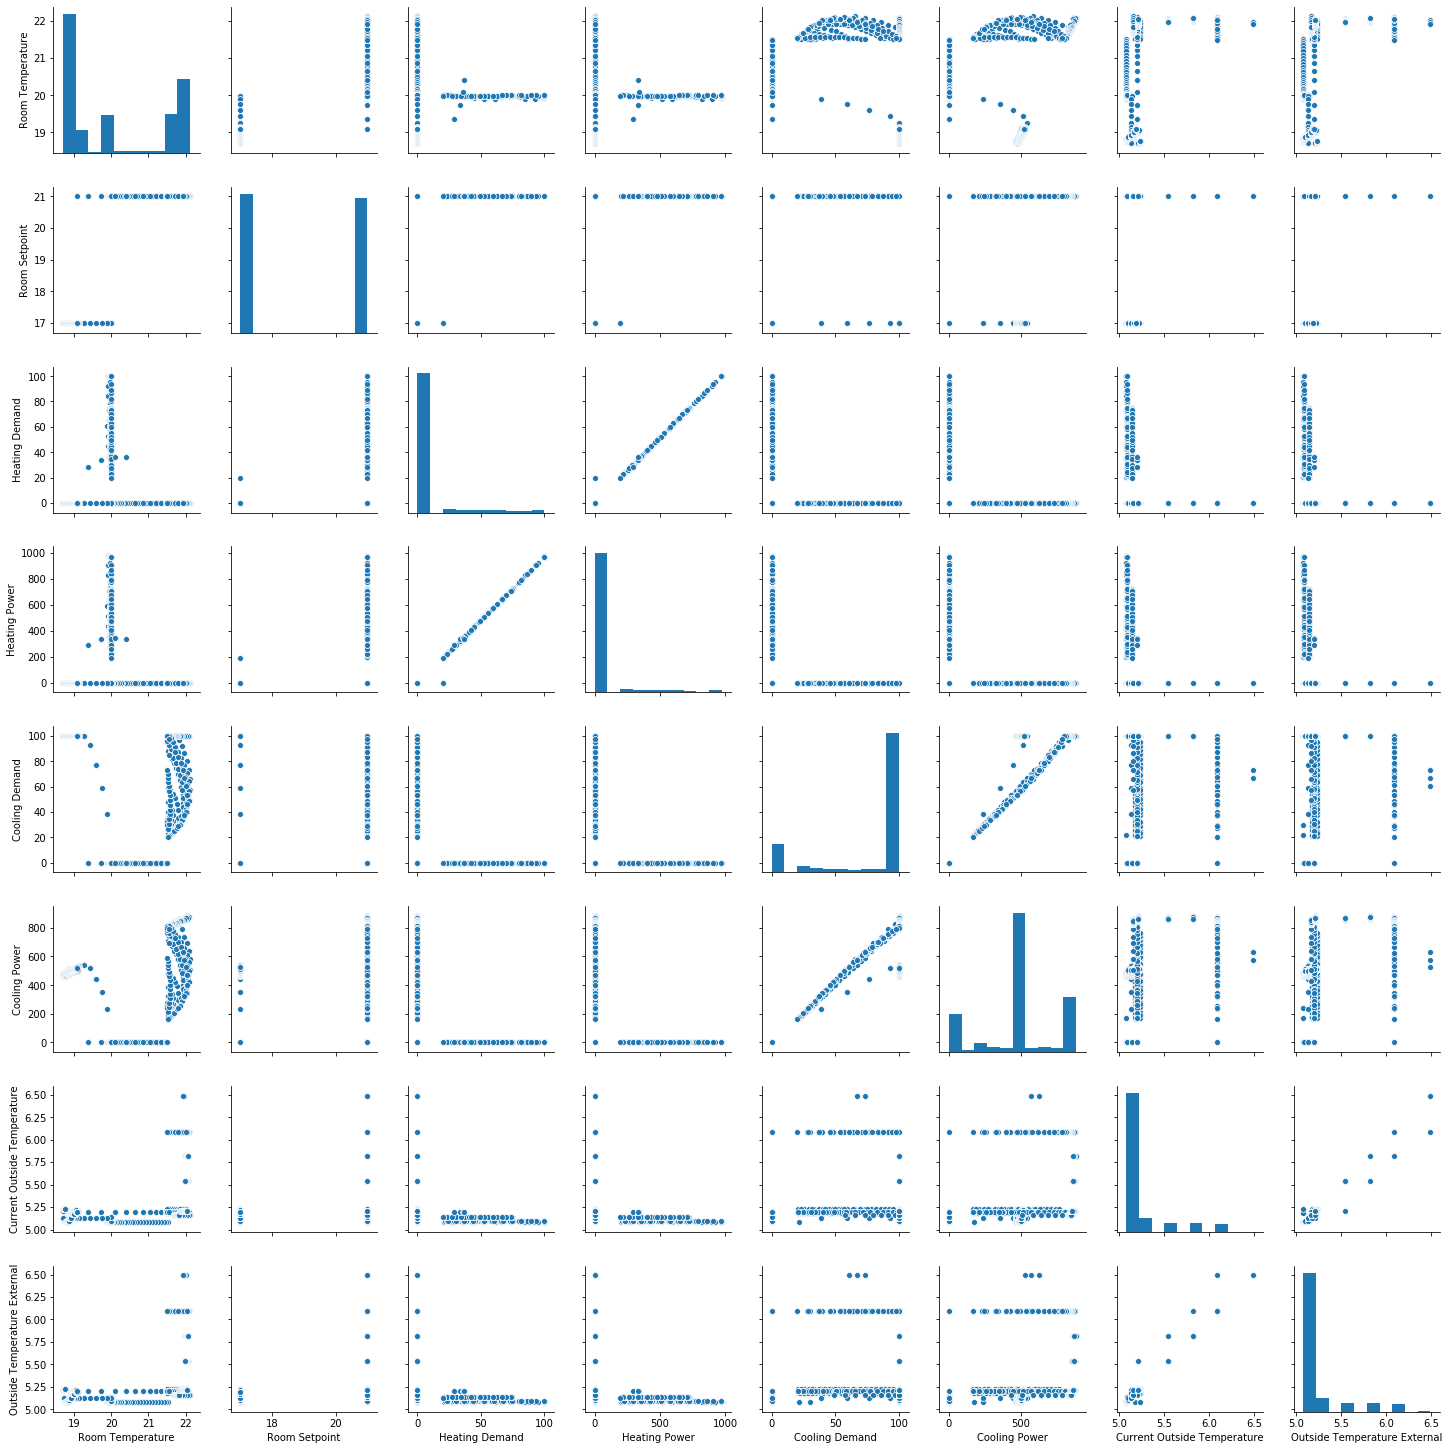

In [15]:
#Pair plot
sns.pairplot(X)
plt.show()

Correlation Matrix and Pairplot shows nothing much since it plots the relationship between variables, not the _Datetime_. Still, a clear observation is that _Heating/Cooling Demand_ and _Heating/Cooling Power_ are strongly correlated.

Below are some interactable plots of some group of features. You can choose which features (not) to plot by clicking on its name on the right side or zoom in, zoom out the graph. Besides the plot of the whole dataset, other plots are plotted too for straightforward visualization and explanation.

In [16]:
#Plot the whole dataset generally
X.iplot(width = 1.5, xTitle = 'Date')

In [17]:
#Plot the Room Temperature, Room Setpoint, Cuurent Outside Temperature, Outside Temperature External
X.loc[ : , ['Room Temperature', 'Room Setpoint', 'Current Outside Temperature', 'Outside Temperature External']].iplot(width = 2, xTitle='Date')

Observations from the above plot:

- _Outside Temperature_ stayed quite stable for the whole recorded time.
- The _Room Temperature_ did not reach 17 degrees at night. In fact, it did not in the comfort range too, meaning that the cooling system was turned on all night long.
- In the beginning, the _Room Temperature_ was higher than the _Room Setpoint_. The time during 18:09 Nov 16 shows that the room was in the stable state _(Room Temperature_ equals _Setpoint)_. Just before and after that, _Room Temperature_ was in the comfort range, so both the cooling and heating systems were off. Then, the _Room Temperature_ continued to drop, indicating that the _Outside Temperature_ may also affect the building at some level.

In [18]:
#Plot the Heating/Cooling Demand, Heating/Cooling Power
X.loc[ : , ['Heating Demand', 'Cooling Demand', 'Heating Power', 'Cooling Power']].iplot(width = 1.5, xTitle='Date')

Observations from the above plot:
- With the _Outdoor Temperature_ below 10 degrees, the assumption is that the heating system would work more than the cooling. However, the plot shows that the cooling system was much in use most of the time in a day.
- There are at least 3 times that the system was in the stable state. Those are times that the no system was turned on.
- The confusing thing is that the power usage for cooling is not consistent. There were 2 periods of time that cooling was maximum turn on. In the first period, the average cooling power was around 500W, while that of the second one was approximately 850W.

In [19]:
#Change Heating/Cooling Demand from range [0, 100] to range [0, 10] for better visualization
#Plot the Room Temperature, Room Setpoint, and Heating/Cooling Demand
X_temp = X.loc[ : , ['Room Temperature', 'Room Setpoint', 'Heating Demand', 'Cooling Demand']]
X_temp['Heating Demand'] = X_temp['Heating Demand'] / 10
X_temp['Cooling Demand'] = X_temp['Cooling Demand'] / 10
X_temp.loc[ : , ['Room Temperature', 'Room Setpoint', 'Heating Demand', 'Cooling Demand']].iplot(width = 2, xTitle='Date')

Observations from the above plot:
- At 8 AM on Nov 17, when the _Room Setpoint_ changed from 17 to 21, the heating only turned on for a few minutes. From then on, the cooling was turned on again for the rest of the recorded time. It means that despite the  _Outside Temperature_ was still less than 10 degrees and did not change much throughout the recorded time, the building temperature somehow raised. The cooling system cannot cool the building well enough to reach the stable state. This situation is opposite to the one at around 18:15 on Nov 16. The cooling was off because the _Room Temperature_ was in the comfort range. However, then the building temperature dropped, the heating had to work. One assumption is that the heat from the sunlight also warms the building up. Thus, building temperature tends to rise in the morning and drops in the afternoon-evening.
- The transitions when the _Room Setpoint_ changed were rough. An assumption is that if the transitions are smooth, less energy is needed. However, this might violate the comfort range at a certain time. Still, it is necessary if we want the changes to be smooth.
- It seems to take around 30 minutes for the _Room Temperature_ to drop 1 degree (of course, with the _Outside Temperature_ around 5-6 degrees). Examples are on Nov 16, from 18:00 to 18:30 and from 21:00 to 21:30.

## 4. Final Goal and Strategy

The objective is to optimize the energy needed for heating and cooling demand.

|<div style="width:25px"><b>No.</b></div>|<div style="width:150px"><b>Step</b></div>|<div style="width:175px"><b>Time</b></div>|<div style="width:500px"><b>Note</b></div>|
|:------:|:---------------|:---------|:------|
|0  | Collect the building data | from 4.11 to 17.11 |<font size="2">The simulator is required to run in real-time, meaning it takes 1 day to collect the building data for that day. We left the simulator run for few times, but it did not perfect. The final collected data, which is also the datasheet used here, was recorded after the system got updated (the <i>Heating/Cooling Power</i> were added).</font>|
|1  | Analyze the data   | from 9.11 to 18.11 |<font size="2">The analysis process started when the first building data collection was finished. At first, there are some system errors. The process restarts when newer and more precise data arrives.</font>|
|2  | Create the models | from 11.11 to now |<font size="2">Models must be made based on the assumptions and observations from the analysis process. Models should predict the desired setpoint for each hour so that the final goal can be achieved without violating the comfort range much. A model is a function written in Python, which is put into the simulator to be tested.</font>|
|3  | Test the models | hopefully from 23.11 to 30.11 |<font size="2">To create the same and equal situations for model testing, the simulator runs each model separately with the same <i>Outside Temperature</i> inputs. The simulator also runs the standard-setting. Thus, it will take n + 1 days to do the testing, with n is the number of models. The intention is to compare different setting's performances to conclude which one has the least energy consumption.</font>|
|4  | Write final document  | hopefully finish by 10.12 |<font size="2">The final document includes the data analysis process, the ideas forming the models, testing results, and conclusion.</font>|

Updated date: 18.11

## 5. Ideas, Hypothesis and Models

### 5.0 Normal building setting

_Room Setpoint_ changes to 21 degrees at 8 AM and 17 degrees at 9 PM. The comfort range in the morning is ±0.5 degree and in the night is ±1.0 degree (assuming ±0.5 degree from 8 AM to 6:15 PM and ±1.0 degree otherwise).

In [20]:
#Copy the Datetime and Setpoint columns from X
normal_setting = pd.DataFrame(X, columns = ['Room Setpoint', 'Room Temperature'], index = None)
normal_setting.reset_index(drop = False, inplace = True)
normal_setting.rename(columns = {'Datetime': 'datetime', 'Room Setpoint' : 'setpoint', 'Room Temperature' : 'room_temp'}, inplace = True)

#Create upper and lower comfort range columns
mask = ((normal_setting['datetime'].dt.hour >= 8) & (normal_setting['datetime'].dt.hour < 18)) | ((normal_setting['datetime'].dt.hour == 18) & (normal_setting['datetime'].dt.minute <=15))
normal_setting['upper_comfort_range'] = np.where(mask, normal_setting['setpoint'] + 0.5, normal_setting['setpoint'] + 1.0)
normal_setting['lower_comfort_range'] = np.where(mask, normal_setting['setpoint'] - 0.5, normal_setting['setpoint'] - 1.0)

#Set index and print sample
normal_setting.set_index(['datetime'], inplace = True)
normal_setting.sample(5)

,setpoint,room_temp,upper_comfort_range,lower_comfort_range
datetime,,,,
2020-11-16 20:29:10,21.0,19.985899,22.0,20.0
2020-11-17 01:19:18,17.0,18.824293,18.0,16.0
2020-11-17 12:20:40,21.0,22.046986,21.5,20.5
2020-11-17 09:17:33,21.0,21.704748,21.5,20.5
2020-11-17 01:48:19,17.0,18.851303,18.0,16.0


In [21]:
#Plot
normal_setting.iplot(width = 2, xTitle = 'Date')

### 5.1 Model 1 - without weather forecast

The objective is to smooth the transitions when the _Room Setpoint_ changes. Instead of changing it to 21 degrees or 17 degrees, we decrease/increase it gradually. The comfort range changes based on the new _Room Setpoint_ too.

One assumption is that the building takes around/less than 30 minutes to drop/rise 1 degree. So the idea here is before and after 30 minutes of the changing time, the _Room Setpoint_ increases/decreases based on a linear equation. The comfort range changes based on the _Room Setpoint_ too.

In [22]:
#Create new dataframe for Model 1
model1 = normal_setting.copy()
model1.drop(columns = ['room_temp'], inplace = True)
model1.reset_index(drop = False, inplace = True)

The time is first checked to see if it is in the wanted range (before and after 30 minutes of the changing time) and then is used as the input for the _Room Setpoint_ formula.

- The formula for increasing from 17 degrees to 21 degrees: $y = \frac{1}{15}*x + 17 $, with x is the number of minutes from 7:30 AM, y is the _Room Setpoint_ at that given time.

- The formula for increasing from 17 degrees to 21 degrees: $y = -\frac{1}{15} *x + 17 $, with x is the number of minutes from 8:30 PM, y is the _Room Setpoint_ at that given time.


In [23]:
#Changing the Setpoint from 17 to 21 degrees
mask1 = (model1['datetime'].dt.hour == 7) & (model1['datetime'].dt.minute > 30)
mask2 = (model1['datetime'].dt.hour == 8) & (model1['datetime'].dt.minute < 30)
model1['setpoint'] = np.where(mask1, (model1['datetime'].dt.minute - 30)/15 + 17, model1['setpoint'])
model1['setpoint'] = np.where(mask2, (model1['datetime'].dt.minute + 30)/15 + 17, model1['setpoint'])

#Changing the Setpoint from 21 to 17 degrees
mask1 = (model1['datetime'].dt.hour == 20) & (model1['datetime'].dt.minute > 30)
mask2 = (model1['datetime'].dt.hour == 21) & (model1['datetime'].dt.minute < 30)
model1['setpoint'] = np.where(mask1, -(model1['datetime'].dt.minute - 30)/15 + 21, model1['setpoint'])
model1['setpoint'] = np.where(mask2, -(model1['datetime'].dt.minute + 30)/15 + 21, model1['setpoint'])

#Change the comfort range
mask = ((model1['datetime'].dt.hour >= 8) & (model1['datetime'].dt.hour < 18)) | ((model1['datetime'].dt.hour == 18) & (model1['datetime'].dt.minute <=15))
model1['upper_comfort_range'] = np.where(mask, model1['setpoint'] + 0.5, model1['setpoint'] + 1.0)
model1['lower_comfort_range'] = np.where(mask, model1['setpoint'] - 0.5, model1['setpoint'] - 1.0)

#Set index
model1.set_index(['datetime'], inplace = True)

In [24]:
#Plot
model1.iplot(width = 2, xTitle = 'Date')

Below is the function written in Python to plug in the simulator. Still, the comfort range should be changed as well.

In [25]:
def corrected_setpoint(hour, minute):
    """Compute setpoint at a give time.

    Args:
        (int) hour: the current time in hour
        (int) minute: the current time in minute

    Returns:
        (float) setpoint: the new setpoint of the room

    Note: Also change the comfort range based on the new setpoint.
    """
    if (hour == 7 and minute > 30) or (hour == 8 and minute < 30):
        if minute < 30:
            setpoint = (minute + 30)/15 + 17
        else:
            setpoint = (minute - 30)/15 + 17
            
    elif (hour == 20 and minute > 30) or (hour == 21 and minute < 30):
        if minute < 30:
            setpoint = -(minute + 30)/15 + 21
        else:
            setpoint = -(minute - 30)/15 + 21
    
    elif hour <= 7 or hour >= 21:
        setpoint = 17
    else:
        setpoint = 21
    
    return setpoint

Some personal thought:
- The model should increase and decrease room temperature gradually by changing the setpoint each minute. Another option is to decrease 1 degree each hour before the changing time, but this option is more dramatic than the model.
- The model increases/decreases the setpoint **before and after** the changing time so that the violated time of the original comfort range is lowest.
- The model is created based on an observation that the building takes around/less than 30 minutes to cool down.
- It is also based on the fact that the outside temperature is around 5 degrees. If the temperature is much higher or lower, the window for the setpoint to change might get bigger.
- Still, it is worth it to try if the outside temperature greatly affects the building.